In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('topp100.csv')

In [3]:
df.head()

,Name,type,image,No of ratings,average rating,about,address
0,1. Qutub Minar,Points of Interest & Landmarks • Architectural...,https://dynamic-media-cdn.tripadvisor.com/medi...,"13,185",4.5,Construction on this sandstone minaret was beg...,"Qutb Minar, Mehrauli, New Delhi 110030 India"
1,2. Marine Drive,Points of Interest & Landmarks • Scenic Drives,https://dynamic-media-cdn.tripadvisor.com/medi...,"8,181",4.5,"Bordering the Arabian Sea, this famous road is...","Mumbai,Maharashtra 400002 India"
2,3. ISKCON Temple Bangalore,Religious Sites,https://dynamic-media-cdn.tripadvisor.com/medi...,"4,811",4.5,ISKCON Sri Radha Krishna temple was inaugurate...,"Chord Road Hare Krishna Hill, Bengaluru 560010..."
3,4. VGP Snow Kingdom,Amusement & Theme Parks,https://dynamic-media-cdn.tripadvisor.com/medi...,643,5.0,"Indoor attraction featuring manmade snow, sled...","East Coast Road Injambakkam, Chennai (Madras) ..."
4,5. Ramoji Film City,Amusement & Theme Parks,https://dynamic-media-cdn.tripadvisor.com/medi...,"4,174",4.5,Visitors can learn all about the local film in...,"Ramoji FIlm City Hayatnagar Mandal, Ranga Redd..."


In [4]:
df['No of ratings'] = df['No of ratings'].str.replace(',', '')
df['No of ratings']=df['No of ratings'].astype(int)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            100 non-null    object 
 1   type            100 non-null    object 
 2   image           100 non-null    object 
 3   No of ratings   100 non-null    int32  
 4   average rating  97 non-null     float64
 5   about           100 non-null    object 
 6   address         99 non-null     object 
dtypes: float64(1), int32(1), object(5)
memory usage: 5.2+ KB


In [6]:
df.columns

Index(['Name', 'type', 'image', 'No of ratings', 'average rating', 'about',
       'address'],
      dtype='object')

In [7]:
df["average rating"].fillna(4.5, inplace=True)
#sub2['income'].fillna((sub2['income'].mean()), inplace=True)

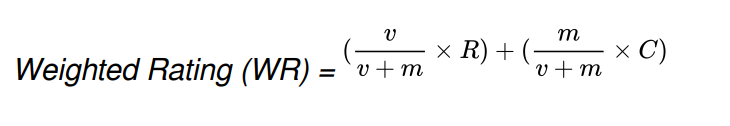
###  v  =  no. of ratings
###  m = minimum no. of ratings required
###  R = average ratings
###  C = mean of all ratings


In [8]:
def quizbased_recommender(df, percentile=0.8):
    #Ask for user preferences
    print("Place Type 1")
    Type_1 = input()
   
    print("Place Type 2")
    Type_2 = input()
    
    print("Place Type 3")
    Type_3 = input()
    
    
    #Filter based on the condition
   
    T1 = df.loc[df['type'].str.contains(Type_1, case=False)] 
    T2 = df.loc[df['type'].str.contains(Type_2, case=False)] 
    T3 = df.loc[df['type'].str.contains(Type_3, case=False)]
    T4=T1.append(T2)
    quiz=T4.append(T3)
    quiz.drop_duplicates()
    
    C = quiz['average rating'].mean()
    m = quiz['No of ratings'].quantile(percentile)
  
    #Only consider places that have higher than m votes. Save this in a new dataframe q_quiz
    q_quiz = quiz.copy().loc[quiz['No of ratings'] >= m]
    #Calculate score using the IMDB formula
    q_quiz['score'] = q_quiz.apply(lambda x:(x['No of ratings']/(x['No of ratings']+m) * x['average rating'])+ (m/(m+x['No of ratings']) * C),axis=1)
    #Sort place in descending order of their scores
    q_quiz = q_quiz.sort_values('score', ascending=False)
    return q_quiz  


# Recommended for you....

In [11]:
quizbased_recommender(df)

Place Type 1
water
Place Type 2
parks
Place Type 3
religious sites


,Name,type,image,No of ratings,average rating,about,address,score
28,29. Golden Temple,Religious Sites,https://dynamic-media-cdn.tripadvisor.com/medi...,9118,5.0,"The Golden Temple, Sri Harimandir Sahib is not...","Golden Temple Road Atta Mandi, Katra Ahluwalia...",4.841564
18,19. Swaminarayan Akshardham,Religious Sites • Gardens,https://dynamic-media-cdn.tripadvisor.com/medi...,11821,4.5,Fantastic site to visit - unimaginable archite...,"Nh 24 Akshardham Setu, New Delhi 110092 India",4.497201
49,50. Gurudwara Bangla Sahib,Historic Sites • Religious Sites,https://dynamic-media-cdn.tripadvisor.com/medi...,6794,4.5,Gurudwara Bangla Sahib (About this soundlisten...,"Ashoka Road Connaught Place, New Delhi 110001 ...",4.495910
46,47. Lake Pichola,Bodies of Water,https://dynamic-media-cdn.tripadvisor.com/medi...,6261,4.5,"Lake Pichola, situated in Udaipur city in the ...","udaipur city, rajasthan 313001 India",4.495699
23,24. Ganges River,Bodies of Water,https://dynamic-media-cdn.tripadvisor.com/medi...,4979,4.5,The Ganges is a trans-boundary river of Asia w...,"Devprayag, the beginning of the main stem of t...",4.495092
2,3. ISKCON Temple Bangalore,Religious Sites,https://dynamic-media-cdn.tripadvisor.com/medi...,4811,4.5,ISKCON Sri Radha Krishna temple was inaugurate...,"Chord Road Hare Krishna Hill, Bengaluru 560010...",4.495000
26,27. Wonderla Amusement Park,Amusement & Theme Parks,https://dynamic-media-cdn.tripadvisor.com/medi...,4233,4.5,"Wonderla Holidays Limited, is the No. 1 amusem...","28th km Mysore Road, Bengaluru 562109 India",4.494653
27,28. Della Adventure Park,Amusement & Theme Parks,https://dynamic-media-cdn.tripadvisor.com/medi...,4216,4.5,Della Adventure Park is India’s Largest Extrem...,"Kunegaon, Lonavala 410401 India",4.494642
4,5. Ramoji Film City,Amusement & Theme Parks,https://dynamic-media-cdn.tripadvisor.com/medi...,4174,4.5,Visitors can learn all about the local film in...,"Ramoji FIlm City Hayatnagar Mandal, Ranga Redd...",4.494614
64,65. Madurai Meenakshi Amman Temple,Religious Sites,https://dynamic-media-cdn.tripadvisor.com/medi...,4099,4.5,Arulmigu Meenakshi Sundareshwarar Temple is a ...,"Madurai Main, Madurai, Tamil Nadu 625001",4.494565
